#                                   Employee Attrition and Performance Analysis

## Description :
               This dataset is about 1470 rows and 35 attributes which consist of 8 categorical variables and 26 numerical variables and the target label for the data set is "attrition". It Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’.

This notebook is structured as follows:

### Exploratory Data Analysis :
  In this section, we explore the dataset by taking a look at the feature distributions, how correlated one feature is to the other and create some Seaborn and Plotly visualisations
### Feature Engineering and Categorical Encoding : 
Conduct some feature engineering as well as encode all our categorical features into dummy variables
### Implementing Machine Learning models : 
We implement a Random Forest and a Gradient Boosted Model after which we look at feature importances from these respective models
                    

# It is a fictional Dataset created by IBM data scientists

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
# Plotly is used to get details when hovered
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Exploratory Data Analysis

In [2]:
## Reading in the input data for IBM Employee Attrition
attrition = pd.read_csv('C:/Users/Aditya/Desktop/Data Sets/Hr.csv')

In [3]:
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### OBSERVATION :

 This is the view of the dataset
our target column with which we can point our model to train on would be the "Attrition" column.

Furthermore, we see that we have a mix of numerical and categorical data types. For the categorical columns, we shall handle their numerical encoding in the latter chapter. This section will be devoted to data exploration and as a first step, let us quickly carry our some simple data completeness checks to see if there are nulls or infinite values in the data

## Checking null values

To look for any null values, we can just invoke the isnull call as follows

In [4]:
# Looking for NaN
display(attrition.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

Text(0.5,1,'Attrition Breakdown')

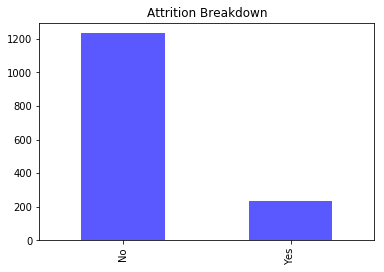

In [5]:
attrition.Attrition.value_counts().plot(kind='bar', color="blue", alpha=.65)
plt.title("Attrition Breakdown")

### OBSERVATION :
    
  The dataset is imbalanced so we have applied oversampling technique SMOTE on the latter stages.

###   Breakdown of Attribution data with respect to Gender

Text(0,0.5,'Frequency of Attrition')

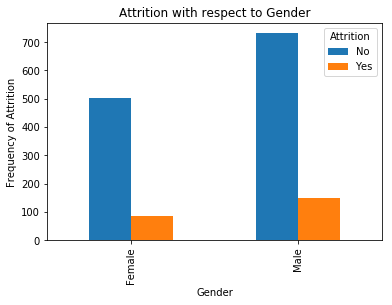

In [6]:
pd.crosstab(attrition.Gender,attrition.Attrition).plot(kind='bar')
plt.title('Attrition with respect to Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Attrition')

### OBSERVATION :

Based on the above chart, Gender seems to have some effect on Attrition. It seems like more male employees have been attritioned than the female employees.

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

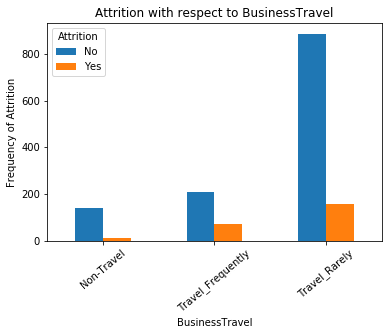

In [7]:
pd.crosstab(attrition.BusinessTravel,attrition.Attrition).plot(kind='bar')
plt.title('Attrition with respect to BusinessTravel')
plt.xlabel('BusinessTravel')
plt.ylabel('Frequency of Attrition')
plt.xticks(rotation=40)

### OBSERVATION :

    The attrition is less in all the cases irrespective of the bussiness travel.

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

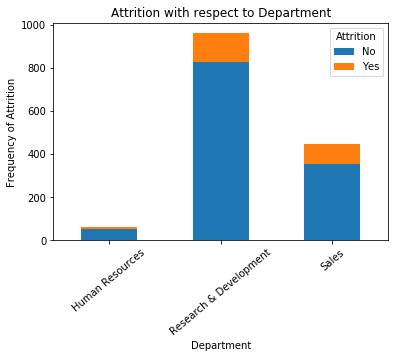

In [8]:
pd.crosstab(attrition.Department,attrition.Attrition).plot(kind='bar', stacked=True)
plt.title('Attrition with respect to Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Attrition')
plt.xticks(rotation=40)

### OBSERVATION :

Department attribute has a prominent effect on the target variable and will be useful for modelling and prediction. R&D department has the highest record for attrition,on the other hand it also has the highest number of employees when compared to HR and Sales departments.

Text(0,0.5,'Frequency of Attrition')

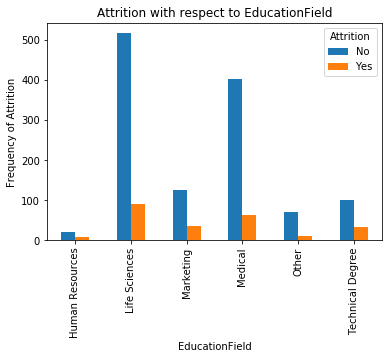

In [9]:
pd.crosstab(attrition['EducationField'],attrition['Attrition']).plot(kind='bar',stacked=False)
plt.title('Attrition with respect to EducationField')
plt.xlabel('EducationField')
plt.ylabel('Frequency of Attrition')

### OBSERVATION :

LifeSciences and Medical fields have the highest number of employees and attrition rate as well. The percentage of employees who have attritioned against those who have been retained seems to be approximately same in all the education fields.

Text(0,0.5,'Frequency of Attrition')

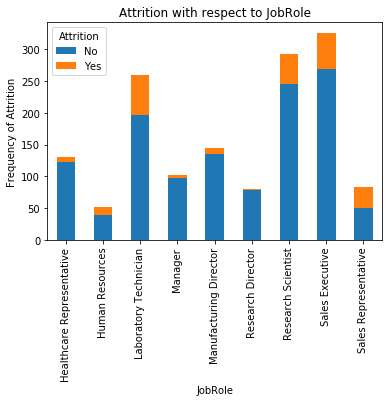

In [10]:
pd.crosstab(attrition['JobRole'],attrition['Attrition']).plot(kind='bar', stacked=True)
plt.title('Attrition with respect to JobRole')
plt.xlabel('JobRole')
plt.ylabel('Frequency of Attrition')

### OBSERVATION :

Job role seems to have an impact on the attrition rate of employees based on the above plot and we see less attrition in the case of Research Director

Text(0,0.5,'Frequency of Attrition')

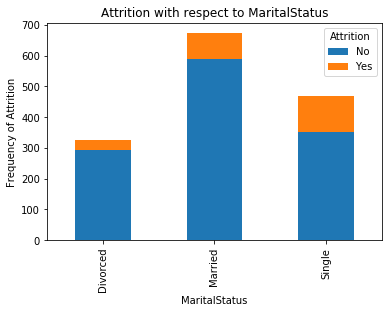

In [11]:
pd.crosstab(attrition['MaritalStatus'],attrition['Attrition']).plot(kind='bar', stacked=True)
plt.title('Attrition with respect to MaritalStatus')
plt.xlabel('MaritalStatus')
plt.ylabel('Frequency of Attrition')

### OBSERVATION :

There is variation in the data set based on the marital status of employees. Among married and divorced people there is lower rate of attrition when compared to employees who are single.

# Distribution of the dataset

Invoking the familiar kdeplot function from the Seaborn plotting library and this generates bivariate plots because  to have a rough idea of how the features are distributed with one another. 

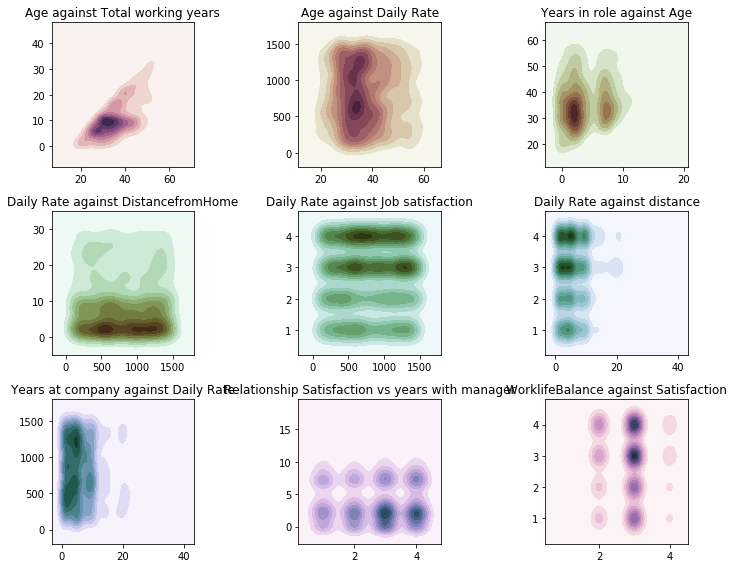

In [12]:
# Plotting the KDEplots
f, axes = plt.subplots(3, 3, figsize=(10, 8), 
                       sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = attrition['Age'].values
y = attrition['TotalWorkingYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Total working years')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['Age'].values
y = attrition['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Age against Daily Rate')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsInCurrentRole'].values
y = attrition['Age'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = 'Years in role against Age')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['DailyRate'].values
y = attrition['DistanceFromHome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = 'Daily Rate against DistancefromHome')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['DailyRate'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'Daily Rate against Job satisfaction')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsAtCompany'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = 'Daily Rate against distance')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsAtCompany'].values
y = attrition['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = 'Years at company against Daily Rate')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['RelationshipSatisfaction'].values
y = attrition['YearsWithCurrManager'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = 'Relationship Satisfaction vs years with manager')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['WorkLifeBalance'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = 'WorklifeBalance against Satisfaction')

f.tight_layout()

## Correlation of Features

 By plotting a correlation matrix, we have a very nice overview of how the features are related to one another. 

In [13]:
# creating a list of only numerical values
numerical = [u'Age', u'DailyRate', u'DistanceFromHome', 
             u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
             u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
             u'StockOptionLevel', u'TotalWorkingYears',
             u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager']
data = [
    go.Heatmap(
        z= attrition[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x=attrition[numerical].columns.values,
        y=attrition[numerical].columns.values,
        colorscale='Viridis',
        reversescale = False,
#         text = True ,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

### Observation :

From the correlation plots, we can see that quite a lot of our columns seem to be poorly correlated with one another. Generally when making a predictive model, it would be preferable to train a model with features that are not too correlated with one another so that we do not need to deal with redundant features. In the case that we have quite a lot of correlated features one could perhaps apply a technique such as Principal Component Analysis (PCA) to reduce the feature space.

In [14]:
attrition_tar= attrition.drop(['Attrition'], axis=1)

In [15]:
y=attrition['Attrition']

### Observation :

Here we have changed the target label which of categorical data type into numerical data type 

### Splitting Data into Train and Test sets

In [16]:
# Import the train_test_split method
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
#from sklearn.cross_validation import StratifiedShuffleSplit

# Split data into train and test sets as well as for validation and testing
x_train, x_test, y_train, y_test = train_test_split(attrition_tar, 
                                                         y, 
                                                         train_size= 0.80,
                                                         random_state=0);

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1176, 34)
(1176,)
(294, 34)
(294,)


In [18]:
type(y_train)

pandas.core.series.Series

## 2. Feature Engineering & Categorical Encoding
    
    

In [19]:
def encoding(data):
    # Empty list to store columns with categorical data
    categorical = []
    for col, value in data.iteritems():
        if value.dtype == 'object':
            categorical.append(col)

    # Store the numerical columns in a list numerical
    numerical = data.columns.difference(categorical)
    attrition_cat = data[categorical]
    attrition_cat = pd.get_dummies(attrition_cat)
    # Store the numerical features to a dataframe attrition_num
    attrition_num = data[numerical]
    # Concat the two dataframes together columnwise
    attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)
    print(attrition_final.columns)
    return attrition_final

In [20]:
x_train_encode=encoding(x_train)
x_train_encode.shape

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobR

(1176, 55)

In [21]:
x_test_encode=encoding(x_test)


Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobR

### OBSERVATION :

Here we are dividing the dataset into numerical datatype and categorical datatype and storing it in a list and For every catergorical column we have created dummy values for example in case of the department column there are three values (R&D , Human resource and Sales) which becomes a seperate columns with numerical values. Having encoded our categorical columns as well as engineering and created some new features from the numerical data, we can now proceed to merging both dataframes into a final set with which we will train and test our models on.

In [22]:
def target_encode(data):
    # Define a dictionary for the target mapping
    target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
    target = data.apply(lambda x: target_map[x])
    return target


In [23]:
y_train_encode=target_encode(y_train)
y_test_encode=target_encode(y_test)

## 3. Implementing Machine Learning Models

In [24]:
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(x_train_encode,y_train_encode)

### OBSERVATION :

Since we have already noted the severe imbalance in the values within the target variable, let us implement the SMOTE method in the dealing with this skewed value via the imblearn Python package.

## Random Forest Classifier

In [25]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [26]:
rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train, smote_target)
print("Fitting of Random Forest finished")

Fitting of Random Forest finished


In [27]:
rf_predictions = rf.predict(x_test_encode)
print("Predictions finished")

Predictions finished


In [28]:
print("Accuracy score: {}".format(accuracy_score(y_test_encode, rf_predictions)))
print("="*80)
print(classification_report(y_test_encode, rf_predictions))

Accuracy score: 0.8537414965986394
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       245
           1       0.57      0.49      0.53        49

   micro avg       0.85      0.85      0.85       294
   macro avg       0.74      0.71      0.72       294
weighted avg       0.85      0.85      0.85       294



##### Feature Ranking via the Random Forest
The Random Forest classifier in Sklearn also contains a very convenient attribute featureimportances which tells us which features within our dataset has been given most importance through the Random Forest algorithm. Shown below is an Interactive Plotly diagram of the various feature importances.

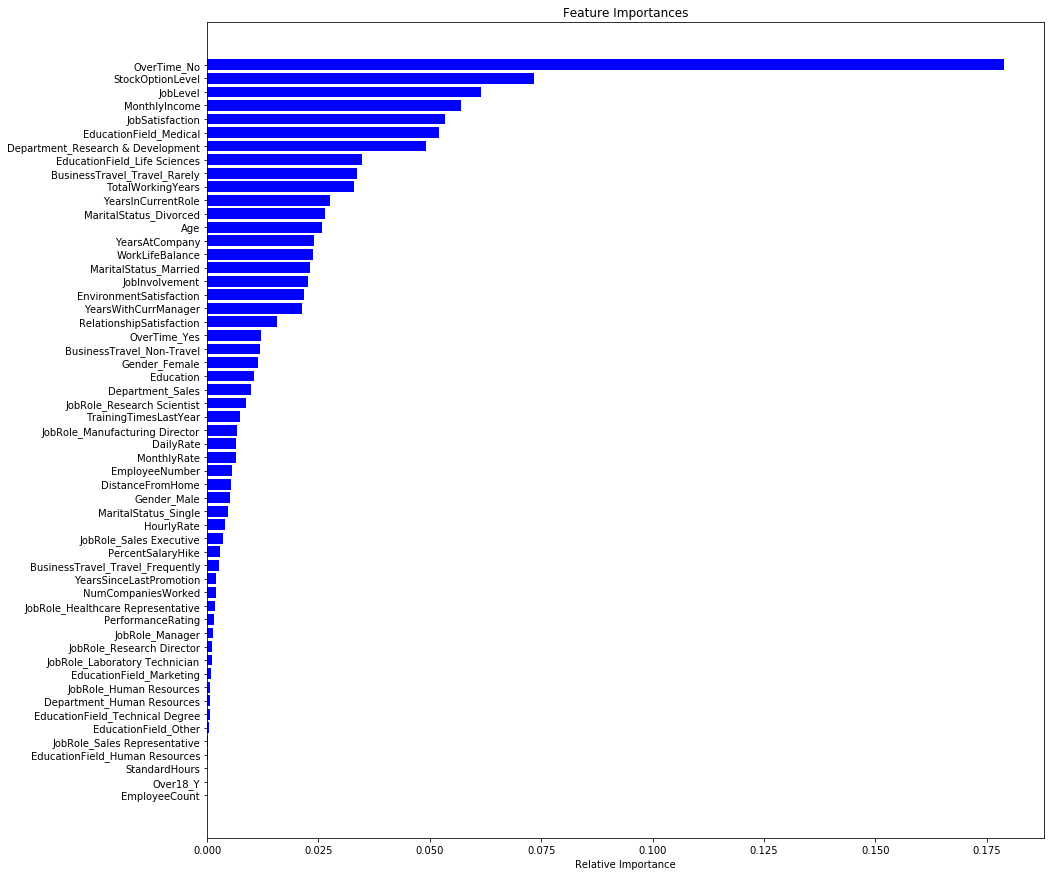

In [29]:
features = x_train_encode.columns.values
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Decision Tree

In [30]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(smote_train, smote_target)
print("Fitting of Random Forest finished")

Fitting of Random Forest finished


In [31]:
dt_predictions = dt.predict(x_test_encode)
print("Predictions finished")

Predictions finished


In [32]:
print("Accuracy score: {}".format(accuracy_score(y_test_encode, dt_predictions)))
print("="*80)
print(classification_report(y_test_encode, dt_predictions))

Accuracy score: 0.7448979591836735
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       245
           1       0.26      0.29      0.27        49

   micro avg       0.74      0.74      0.74       294
   macro avg       0.56      0.56      0.56       294
weighted avg       0.76      0.74      0.75       294



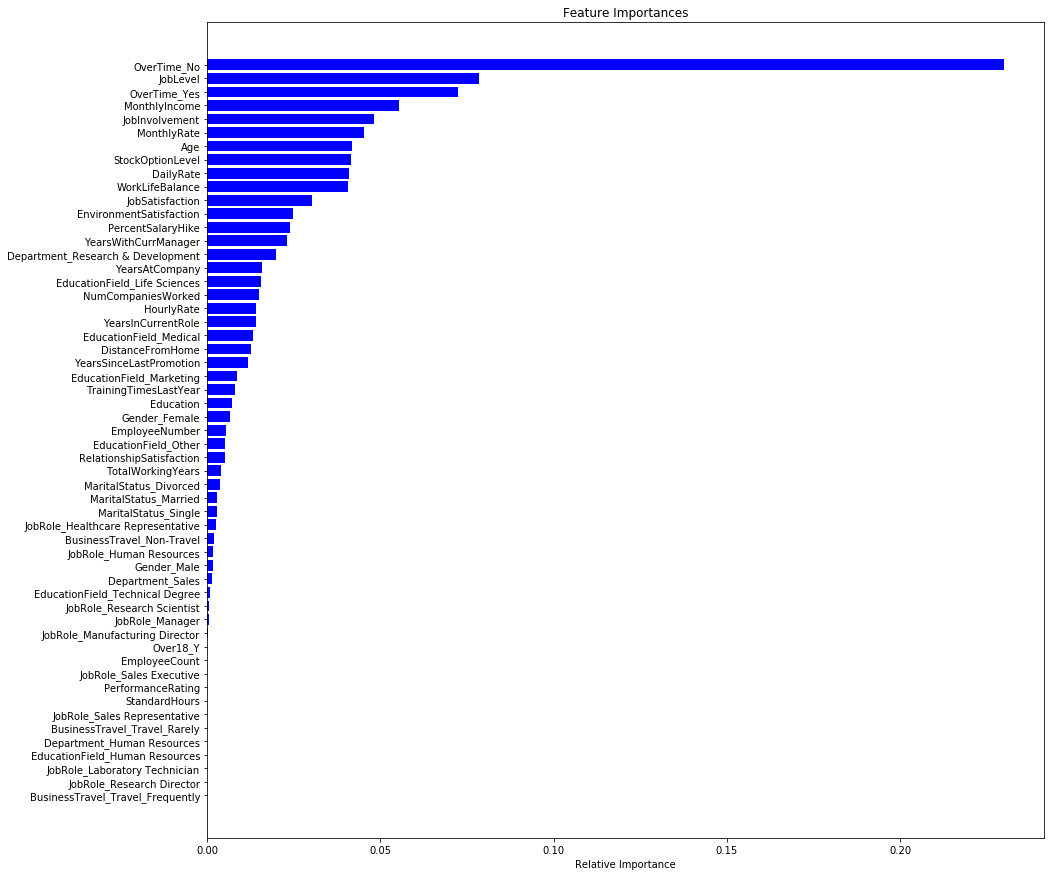

In [33]:
features = x_train_encode.columns.values
importances = dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Gradient Boosted Classifier

In [34]:
# Gradient Boosting Parameters
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [35]:
gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(smote_train, smote_target)
# Get our predictions
gb_predictions = gb.predict(x_test_encode)
print("Predictions have finished")

Predictions have finished


In [36]:
print(accuracy_score(y_test_encode, gb_predictions))
print("="*80)
print(classification_report(y_test_encode, gb_predictions))

0.8605442176870748
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       245
           1       0.64      0.37      0.47        49

   micro avg       0.86      0.86      0.86       294
   macro avg       0.76      0.66      0.69       294
weighted avg       0.84      0.86      0.84       294



Feature Ranking via the Gradient Boosting Model
Much like the Random Forest, we can invoke the featureimportances attribute of the gradient boosting model and dump it in an interactive Plotly chart

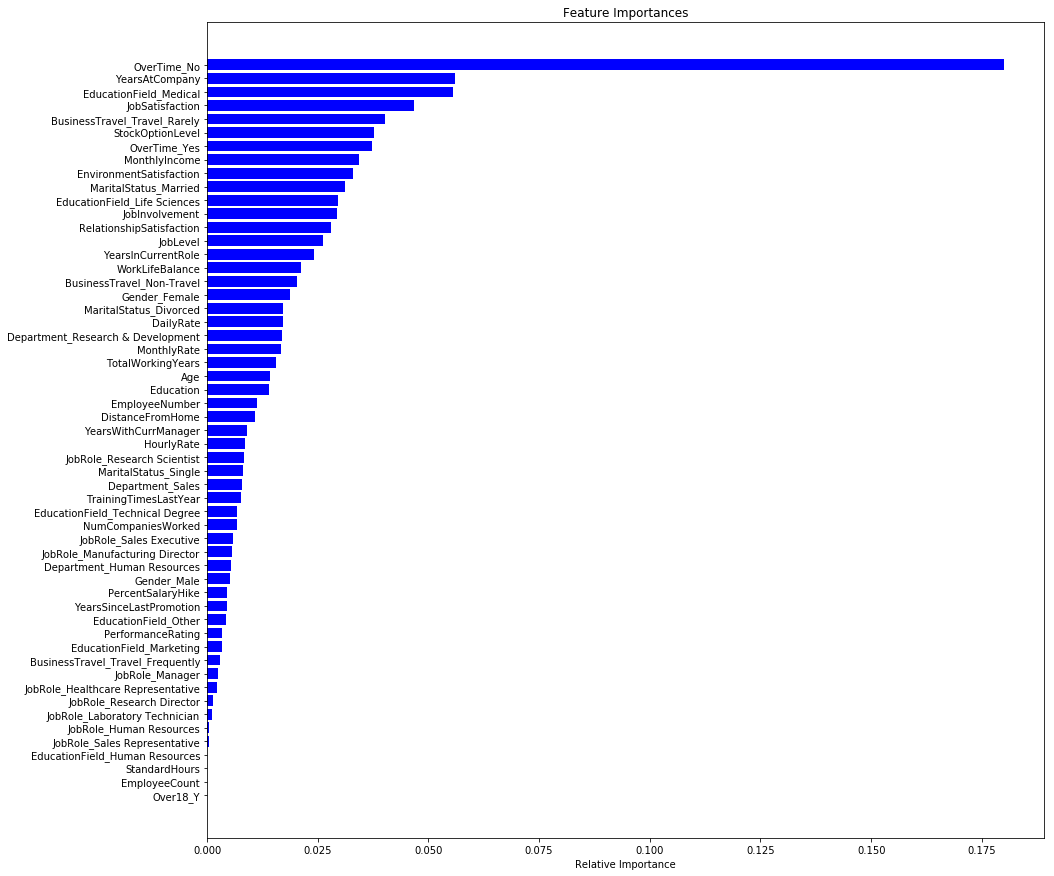

In [37]:
features = x_train_encode.columns.values
importances = gb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()